<a href="https://colab.research.google.com/github/sanjinomo/BUCASH-Online-Financial-System-/blob/main/thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path= "/content/drive/MyDrive/all_csv/"
files = os.path.join(path, "csv*.csv")


In [ ]:
os.listdir(path)

['csv1.csv', 'csv3.csv', 'csv2.csv', 'csv4.csv', 'csv5.csv']

In [ ]:
files = glob.glob(files)
df = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [ ]:
df.head(10)

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2020-03-19 23:58:27,MetamorphosisPB,NaN,0,0,0,Check out page 8 of this week’s East Aurora Ad...,NaN,NaN,NaN,1240789765978537984,https://twitter.com/MetamorphosisPB/status/124...
1,2020-03-19 23:56:38,t_zeitchick,NaN,0,0,0,Anxiety keeping you up? Amazons got you at 3:3...,NaN,NaN,NaN,1240789306886828033,https://twitter.com/t_zeitchick/status/1240789...
2,2020-03-19 23:51:35,HoggStanDan,FilmInquiry,0,0,0,"Harlem Nights, Booksmart, Fletch, the Hangover...",NaN,NaN,NaN,1240788039292633090,https://twitter.com/HoggStanDan/status/1240788...
3,2020-03-19 23:51:28,bb_nug,NaN,1,0,4,All quarantine has done so far is give me anxi...,NaN,NaN,NaN,1240788008208437255,https://twitter.com/bb_nug/status/124078800820...
4,2020-03-19 23:50:43,CZR93,smart_MS3,0,1,0,The scariest part is the “No Symptoms” gives m...,NaN,NaN,NaN,1240787817602486272,https://twitter.com/CZR93/status/1240787817602...
5,2020-03-19 23:49:11,Alphakitty27,NaN,2,1,3,My anxiety is the worst it’s ever been in my l...,NaN,@Sir_Narwhal,NaN,1240787432410406914,https://twitter.com/Alphakitty27/status/124078...
6,2020-03-19 23:48:07,_UrrbanBeauty,YouTrynaBeSHY,0,0,0,This is something I’ll do .. it helps with my ...,NaN,NaN,NaN,1240787163597484040,https://twitter.com/_UrrbanBeauty/status/12407...
7,2020-03-19 23:44:17,microash12,NaN,1,0,1,We all know what’s causing some people stress ...,NaN,NaN,NaN,1240786201768013832,https://twitter.com/microash12/status/12407862...
8,2020-03-19 23:43:32,theshantadenise,NaN,0,0,0,I was diagnosed with anxiety yesterday,NaN,NaN,NaN,1240786012772667399,https://twitter.com/theshantadenise/status/124...
9,2020-03-19 23:42:52,DrGBaylon,NaN,2,0,9,While stocking up on essentials for our San Fr...,NaN,@LisandroMaya,#ShelterInPlace #MatchDay2020,1240785845558194176,https://twitter.com/DrGBaylon/status/124078584...


**Data Exploration**

In [ ]:
df.shape

(5000, 12)

In [ ]:
df.dtypes

date          object
username      object
to            object
replies        int64
retweets       int64
favorites      int64
text          object
geo          float64
mentions      object
hashtags      object
id             int64
permalink     object
dtype: object

In [ ]:
#Removing redundant columns like date username to replies

df = df.drop(['date','username','to','replies','retweets','favorites','geo','mentions','hashtags','id','permalink'], axis = 1)
df.head(10)
dataset2=df

Text(0.5, 1.0, 'Tweets')

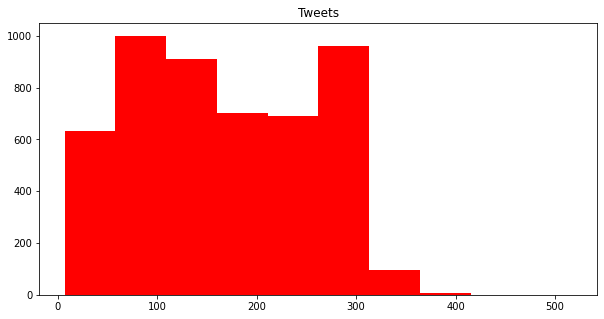

In [ ]:
fig,(ax1)=plt.subplots(1,figsize=(10,5))
tweet_len=df['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Tweets')

In [ ]:
df.isnull().sum()

text    0
dtype: int64

**Data Preprocessing**

In [ ]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.1 MB/s 


In [ ]:
import re
from gensim.utils import simple_preprocess
import gensim
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

import spellchecker
from spellchecker import SpellChecker
import spacy


**Removing Emojis**

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


**Spelling Correction**

In [ ]:


spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        


**Removing URLs with a regular expression**

In [ ]:
df.dtypes

text    object
dtype: object

**Removing Hashtags**

In [ ]:
def remove_urls(text):
    res = re.sub(r'[^\w\s]', '', df['text'])
    return res.sub(r'', text)

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

for i in range(len(df)):
  df.at[i,'text'] = remove_urls(df.iloc[i]['text'])

df.head(10)

,text
0,Check out page 8 of this week’s East Aurora Ad...
1,Anxiety keeping you up? Amazons got you at 3:3...
2,"Harlem Nights, Booksmart, Fletch, the Hangover..."
3,All quarantine has done so far is give me anxi...
4,The scariest part is the “No Symptoms” gives m...
5,My anxiety is the worst it’s ever been in my l...
6,This is something I’ll do .. it helps with my ...
7,We all know what’s causing some people stress ...
8,I was diagnosed with anxiety yesterday
9,While stocking up on essentials for our San Fr...


In [ ]:
# # Define functions for stopwords

# stop_words = set(stopwords.words("english"))


# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
#     data_words_nostops = remove_stopwords(data_words)

In [ ]:
#converting df to list
datalist = df['text'].values.tolist()
# Remove Emails
datalist = [re.sub('\S*@\S*\s?', '', sent) for sent in datalist]

# Remove new line characters
datalist = [re.sub('\s+', ' ', sent) for sent in datalist]

# Remove distracting single quotes
datalist = [re.sub("\'", "", sent) for sent in datalist]



**Sentence to Words**

In [ ]:
#convert sentence to words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
 

data_to_word = list(sent_to_words(datalist))

print(data_to_word[:10])

[['check', 'out', 'page', 'of', 'this', 'week', 'east', 'aurora', 'advertiser', 'for', 'tips', 'on', 'taking', 'care', 'of', 'yourself', 'during', 'this', 'stressful', 'time', 'you', 'can', 'help', 'yourself', 'to', 'lower', 'your', 'anxiety', 'level', 'and', 'to', 'keep', 'your', 'body', 'as', 'healthy', 'as', 'possible'], ['anxiety', 'keeping', 'you', 'up', 'amazons', 'got', 'you', 'at', 'am', 'when', 'you', 'want', 'to', 'order', 'some', 'foot', 'scrub', 'and', 'dog', 'brush'], ['harlem', 'nights', 'booksmart', 'fletch', 'the', 'hangover', 'tommy', 'boy', 'high', 'anxiety', 'history', 'of', 'the', 'world', 'part', 'spaceballs', 'daffy', 'duck', 'quackbusters', 'abbott', 'and', 'costello', 'meet', 'frankenstein'], ['all', 'quarantine', 'has', 'done', 'so', 'far', 'is', 'give', 'me', 'anxiety', 'and', 'an', 'online', 'shopping', 'addiction'], ['the', 'scariest', 'part', 'is', 'the', 'no', 'symptoms', 'gives', 'me', 'anxiety', 'tbh'], ['my', 'anxiety', 'is', 'the', 'worst', 'it', 'ever

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
# nlp = spacy.load("en_core_web_sm")
# nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_to_word, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_to_word], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_to_word[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['check', 'out', 'page', 'of', 'this', 'week', 'east', 'aurora', 'advertiser', 'for', 'tips', 'on', 'taking', 'care', 'of', 'yourself', 'during', 'this', 'stressful', 'time', 'you', 'can', 'help', 'yourself', 'to', 'lower', 'your', 'anxiety', 'level', 'and', 'to', 'keep', 'your', 'body', 'as', 'healthy', 'as', 'possible']


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization

stop_words = set(stopwords.words("english"))


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
data_lemmatized = lemmatization(data_to_word, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['check', 'page', 'week', 'tip', 'take', 'care', 'stressful', 'time', 'help', 'lower', 'anxiety', 'level', 'keep', 'body', 'as', 'healthy', 'possible']]


In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_to_word)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)



# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['check', 'page', 'week', 'advertiser', 'tip', 'take', 'care', 'stressful', 'time', 'help', 'low', 'anxiety', 'level', 'keep', 'body', 'healthy', 'possible']]


**Put Lametized words in corpus**

In [ ]:
corpus = []
for i in range(len(data_lemmatized)):
    corpus.append(" ".join(data_lemmatized[i]))
corpus = pd.Series(corpus)

print (corpus[:10])

0    check page week advertiser tip take care stres...
1    anxiety keep amazon get want order foot scrub ...
2    night fletch hangover boy high anxiety history...
3    quarantine do far give anxiety online shopping...
4                      scary part symptom give anxiety
5    anxiety bad ever life thankful self_isolation ...
6                         help anxiety start cry outta
7    know cause people stress anxiety make happy right
8                           diagnose anxiety yesterday
9    stocking essential order forgot include champa...
dtype: object


**TF-IDF**

In [ ]:
dataset2['cleaned'] = corpus
dataset2

,text,cleaned
0,Check out page 8 of this week’s East Aurora Ad...,check page week advertiser tip take care stres...
1,Anxiety keeping you up? Amazons got you at 3:3...,anxiety keep amazon get want order foot scrub ...
2,"Harlem Nights, Booksmart, Fletch, the Hangover...",night fletch hangover boy high anxiety history...
3,All quarantine has done so far is give me anxi...,quarantine do far give anxiety online shopping...
4,The scariest part is the “No Symptoms” gives m...,scary part symptom give anxiety
...,...,...
4995,"Depression, anxiety and PTSD are very real. I ...",depression anxiety ptsd real like friend post ...
4996,"Lord, ask that you watch and keep us on the wa...",ask keep way back body soul guide respective d...
4997,As someone with an actual anxiety disorder I h...,actual anxiety disorder weird thing feel less ...
4998,Amerie went home sick w/ a cough and 103 fever...,go home sick cough fever anxiety test say ask ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer                                                                        

In [ ]:
# tfidf = TfidfVectorizer(stop_words='english', max_features=9000).fit(raw_documents=dataset2['cleaned'])
tfidf= TfidfVectorizer(ngram_range=(1,3), max_features=9000).fit(raw_documents=dataset2['cleaned'])
# tfidf = TfidfVectorizer(min_df = 5, max_df = 0.95,stop_words='english', max_features=9000).fit(raw_documents=dataset2['cleaned'])
tfidf_feature_names = tfidf.get_feature_names()
print (tfidf_feature_names)


['abandon', 'ability', 'able', 'able access', 'able escape', 'able focus', 'able get', 'able get back', 'able go', 'able pay', 'able see', 'able sleep', 'able sleep week', 'abortion', 'absolute', 'absolute bad', 'absolutely', 'absolutely disgusting', 'absorb', 'abundance', 'abuse', 'academic', 'accept', 'acceptance', 'access', 'accident', 'accidentally', 'accommodation', 'accomplish', 'accord', 'account', 'ache', 'ache anxiety', 'achieve', 'acid', 'acid reflux', 'acknowledge', 'act', 'action', 'active', 'active practice', 'actively', 'activity', 'actual', 'actual anxiety', 'actually', 'actually anxiety', 'actually cause', 'actually get', 'actually give', 'actually good', 'actually make', 'actually need', 'actually sick', 'actually suffer', 'acupuncture', 'adapt', 'adapt combat', 'adapt combat worry', 'add', 'add anxiety', 'add people', 'add people anxiety', 'addiction', 'addition', 'additional', 'address', 'address anxiety', 'adhd', 'adjust', 'adjust new', 'adjust new norm', 'adjustmen

**Min-Max Scaler**

In [ ]:
tfidf_dataX = tfidf.transform(dataset2['cleaned'])
print(tfidf_dataX)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


  (0, 8695)	0.13886265690002214
  (0, 8130)	0.2727430403548462
  (0, 8122)	0.18225154812468652
  (0, 8046)	0.2634230112213115
  (0, 7995)	0.09776131273163821
  (0, 7670)	0.22283727967299902
  (0, 7655)	0.12521120099297192
  (0, 7490)	0.23715132464735397
  (0, 7487)	0.20675422589083398
  (0, 5991)	0.20405291392554564
  (0, 5638)	0.23373796257342858
  (0, 4867)	0.2634230112213115
  (0, 4866)	0.18648324701081956
  (0, 4656)	0.2727430403548462
  (0, 4647)	0.15064136036305165
  (0, 4371)	0.13783950947521717
  (0, 3893)	0.2727430403548462
  (0, 3836)	0.1123416878382778
  (0, 3800)	0.18501040357895765
  (0, 1616)	0.16255453115844423
  (0, 1514)	0.16596789323236968
  (0, 1312)	0.18159704150503223
  (0, 584)	0.2727430403548462
  (0, 580)	0.17211543110996316
  (0, 251)	0.0335241127256062
  :	:
  (4997, 43)	0.22754224883775653
  (4998, 8264)	0.19203585045766036
  (4998, 7836)	0.13423907749642117
  (4998, 7824)	0.5310555981286785
  (4998, 7817)	0.3423571237214411
  (4998, 6986)	0.16691619768013974

In [ ]:
X=tfidf_dataX.toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(5000, 9000)

Model: **LDA**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.decomposition import LatentDirichletAllocation
style.use("fivethirtyeight")

In [ ]:
no_topics = 5
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
tfidfdist = lda.fit_transform(tfidf_dataX.toarray())

In [ ]:
tfidfdist

array([[0.03479966, 0.03482783, 0.86077612, 0.03480124, 0.03479515],
       [0.04728993, 0.04725167, 0.68898456, 0.04725103, 0.16922281],
       [0.05196347, 0.05196256, 0.79213424, 0.05196199, 0.05197774],
       ...,
       [0.03610371, 0.03610364, 0.85558277, 0.0361035 , 0.03610637],
       [0.04160384, 0.04160371, 0.83357408, 0.04160353, 0.04161484],
       [0.06093552, 0.06093568, 0.75625842, 0.06093572, 0.06093466]])

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))



print('LDA')

no_top_words = 1000       
display_topics(lda, tfidf_feature_names, no_top_words)

LDA
Topic 0:
terrible, relieve anxiety, terrible anxiety, antidote, source anxiety, overcome anxiety, relieve, source, anxiety, extinction, extinction anxiety, allergy anxiety, bad case, case scenario, bad case scenario, want, everyday, day everyday want, want day everyday, proven_solution, everyday want overcome, tone proven_solution, everyday want, overcome anxiety tone, anxiety tone proven_solution, want overcome, anxiety tone, tone proven_solution contact, proven_solution contact, want overcome anxiety, want day, day everyday, overcome, tone, psalm pic_twitter, psalm pic_twitter com, moment, triple, row, find moment, help relieve anxiety, gym want day, gym want, anxiety give, anxiety comfort, contact, cast anxiety, soul, last_night, smart, antidote exercise, exercise free, antidote exercise free, exercise free minute, free minute, comfort, explain child anxiety, explain child, way manage, antidote anxiety, anxiety comfort soul, soul psalm, comfort soul psalm, comfort soul, soul psa

In [ ]:
tfidfdist.shape

(5000, 5)

In [ ]:
X2 = lda.transform(tfidf_dataX)

In [ ]:
X2

array([[0.03479966, 0.03482783, 0.86077612, 0.03480124, 0.03479515],
       [0.04728993, 0.04725167, 0.68898456, 0.04725103, 0.16922281],
       [0.05196347, 0.05196256, 0.79213424, 0.05196199, 0.05197774],
       ...,
       [0.03610371, 0.03610364, 0.85558277, 0.0361035 , 0.03610637],
       [0.04160384, 0.04160371, 0.83357408, 0.04160353, 0.04161484],
       [0.06093552, 0.06093568, 0.75625842, 0.06093572, 0.06093466]])

**MINMAX**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X2 = MinMaxScaler().fit_transform(X2)

**K-Means Clustering**

In [ ]:
X2.shape

(5000, 5)

Use Elbow Method and find value of K

In [ ]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [ ]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(X2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
# mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters = pd.DataFrame({'Clusters' : range(1,12), 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,451.502862
1,2,178.706421
2,3,123.828143
3,4,96.866959
4,5,68.804410
5,6,47.741448
6,7,34.210625
7,8,28.812557
8,9,24.857368
9,10,21.197181


In [ ]:
# sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

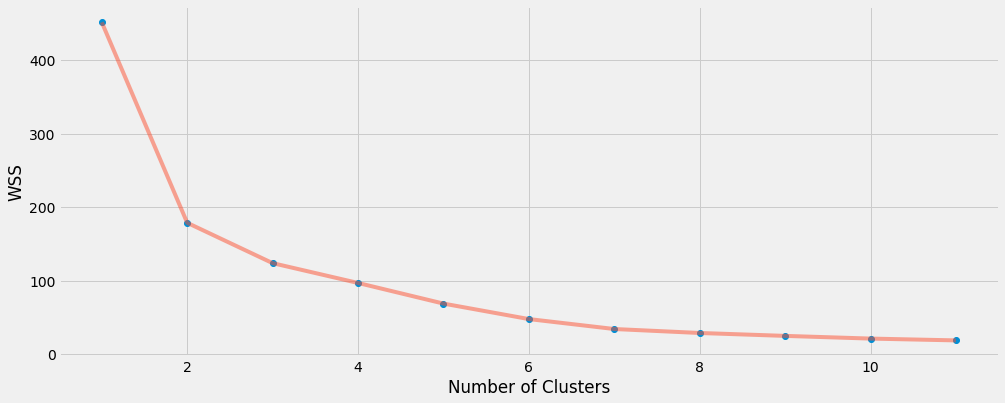

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 12) , wss , 'o')
plt.plot(np.arange(1 , 12) , wss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('WSS')
plt.show()

In [ ]:
# from sklearn.cluster import KMeans
# wcss = []

# for k in range(1,10):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(tfidf_dataX)
#     wcss.append(kmeans.inertia_)
# print(k)


    
# plt.plot(range(1,10),wcss)
# plt.xlabel("number of k (cluster) value")
# plt.ylabel("wcss")
# plt.show()
# print(wcss)

Here Elbow Created at point 5
So K=5

In [ ]:
kmeans2 = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
kmeans2.fit(X2)
clusters = kmeans2.labels_

In [ ]:
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
[c for c in clusters][:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
X2.shape

(5000, 5)

In [ ]:
tfidf_dataX.shape

(5000, 9000)

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=80)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X2)
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]


In [ ]:
x0

array([-0.14934796,  0.10062961, -0.06631292, ..., -0.14306027,
       -0.11643714, -0.02292555])

In [ ]:
x1

array([-0.02546505, -0.05661288,  0.00630805, ..., -0.02307207,
       -0.01288467,  0.02294089])

In [ ]:
# assign clusters and pca vectors to our dataframe 
dataset2['cluster'] = clusters
dataset2['x0'] = x0
dataset2['x1'] = x1

In [ ]:
dataset2

,text,cleaned,cluster,x0,x1
0,Check out page 8 of this week’s East Aurora Ad...,check page week advertiser tip take care stres...,1,-0.149348,-0.025465
1,Anxiety keeping you up? Amazons got you at 3:3...,anxiety keep amazon get want order foot scrub ...,1,0.100630,-0.056613
2,"Harlem Nights, Booksmart, Fletch, the Hangover...",night fletch hangover boy high anxiety history...,1,-0.066313,0.006308
3,All quarantine has done so far is give me anxi...,quarantine do far give anxiety online shopping...,1,0.319421,-0.114342
4,The scariest part is the “No Symptoms” gives m...,scary part symptom give anxiety,1,0.191912,-0.038055
...,...,...,...,...,...
4995,"Depression, anxiety and PTSD are very real. I ...",depression anxiety ptsd real like friend post ...,1,-0.124547,-0.015952
4996,"Lord, ask that you watch and keep us on the wa...",ask keep way back body soul guide respective d...,1,-0.133656,-0.019426
4997,As someone with an actual anxiety disorder I h...,actual anxiety disorder weird thing feel less ...,1,-0.143060,-0.023072
4998,Amerie went home sick w/ a cough and 103 fever...,go home sick cough fever anxiety test say ask ...,1,-0.116437,-0.012885


Get Top Keywords

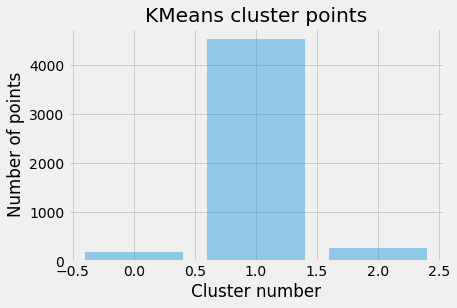

In [ ]:
plt.bar([x for x in range(3)], dataset2.groupby(['cluster'])['text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
# def get_top_keywords(n_terms):
#     """This function returns the keywords for each centroid of the KMeans"""
#         print('\nCluster {}'.format(i))
#         print(','.join([feature_name[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
# get_top_keywords(30)
# ///


def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(tfidf_dataX.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = tfidf_feature_names # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(30)




Cluster 0
open body,body shame,double,great joy,anxiety great joy,great joy psalm,joy psalm,thank,body,want,terrible anxiety,overcome,extinction anxiety,extinction,pic_twitter,pic_twitter com,com,antidote,joy,psalm,relieve,source,relieve anxiety,source anxiety,terrible,great,anxiety great,real,anxiety real,anxiety

Cluster 1
fear,anxiety roof,right,thing,think,take,bad,high,give,much,today,depression,good,roof,make,need,stress,know,pic_twitter com,com,pic_twitter,work,people,day,help,feel,time,go,get,anxiety

Cluster 2
chronic ass,anxiety handle,today,give anxiety attack,anxiety chronic,iconic,ass iconic,shit give,shit,kill,anxiety fuck,anxiety suck,suck,hate anxiety,anxiety kick,bad,bad anxiety,ass,kick,hate,fuck,give much anxiety,give much,attack,much,much anxiety,anxiety attack,anxiety,give anxiety,give


In [ ]:
# # map clusters to appropriate labels 
# cluster_map = {0: "Give, So much", 1: "Impose, Improve, Impulse", 2: "Important, Isolation", 3: "Depressive Words", 4: "Important, Prioritize, Mental",  5:"Social Media Words"}
# # apply mapping
# df['cluster'] = df['cluster'].map(cluster_map)

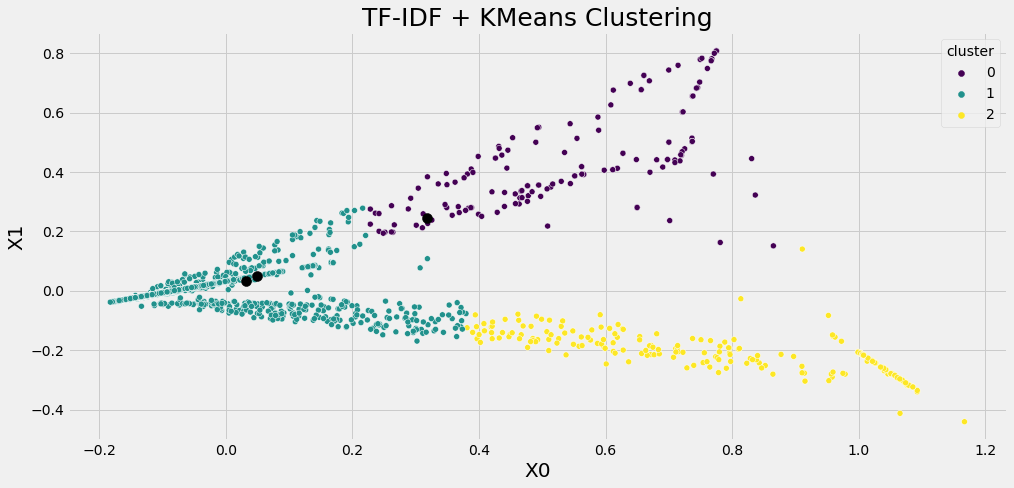

In [ ]:
# set image size
plt.figure(figsize=(15, 7))
# set a title
plt.title("TF-IDF + KMeans Clustering", fontdict={"fontsize": 25})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 20})
plt.ylabel("X1", fontdict={"fontsize": 20}) 

# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=dataset2, x='x0', y='x1', hue='cluster', palette="viridis")
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.show()

In [ ]:
df

,text,cleaned,cluster,x0,x1
0,Check out page 8 of this week’s East Aurora Ad...,check page week advertiser tip take care stres...,1,-0.149348,-0.025465
1,Anxiety keeping you up? Amazons got you at 3:3...,anxiety keep amazon get want order foot scrub ...,1,0.100630,-0.056613
2,"Harlem Nights, Booksmart, Fletch, the Hangover...",night fletch hangover boy high anxiety history...,1,-0.066313,0.006308
3,All quarantine has done so far is give me anxi...,quarantine do far give anxiety online shopping...,1,0.319421,-0.114342
4,The scariest part is the “No Symptoms” gives m...,scary part symptom give anxiety,1,0.191912,-0.038055
...,...,...,...,...,...
4995,"Depression, anxiety and PTSD are very real. I ...",depression anxiety ptsd real like friend post ...,1,-0.124547,-0.015952
4996,"Lord, ask that you watch and keep us on the wa...",ask keep way back body soul guide respective d...,1,-0.133656,-0.019426
4997,As someone with an actual anxiety disorder I h...,actual anxiety disorder weird thing feel less ...,1,-0.143060,-0.023072
4998,Amerie went home sick w/ a cough and 103 fever...,go home sick cough fever anxiety test say ask ...,1,-0.116437,-0.012885


In [ ]:
# Reading a review which belong to each group.
for i in range(3):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['cluster']).groups[i][0]]['text'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
When your child on the spectrum only eats one thing everyday...praying @littlecaesars doesn’t shut down. The pepperoni pizza is my daughter’s sole form of nutrition at this point. The anxiety of all this happening…  …


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
Check out page 8 of this week’s East Aurora Advertiser for tips on taking care of yourself during this stressful time. You can help yourself to lower your anxiety level and to keep your body as healthy as possible.…  …


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
I have never felt such anxiety, it’s killing me.


________________________________________________

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['cluster'],kmeans.labels_))
print(classification_report(df['cluster'],kmeans.labels_))

[[   0    0   47    0   26   50    0   29    0    2   29]
 [2645    0    0 1355    0    0    0   10  109  418    0]
 [   0   98    0    0    0    0  160    0   22    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     183.0
           1       0.00      0.00      0.00    4537.0
           2       0.00      0.00      0.00     280.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
